Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [1]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 6.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 7.1 MB/s eta 0:00:007.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.6 MB/s eta 0:00:006.6 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 7.6 MB/s eta 0:00:008.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.8 MB/s eta 0:00:008.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 7.6 MB/s eta 0:00:00m eta 0:00

In [2]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#pixelvalues are normalized to the range 0 to 1
x_train /= 255
x_test /= 255

#one-hot encoding, so 
#the training and test labels (categorical data variables)
#are converted to vectors that can be fed to the machine learning algo
y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)

#
len(x_train) # = 60 000

60000

In [5]:
## Define model ##
model = Sequential() #allows us to build NN by stacking layers on top of each other

#converts 2D input to a 1D vector
#används som transition layer mellan convolutional layers and fully connected layers
#snarare input layer??
model.add(Flatten())

#relu introduces the non-linearity property to the model
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
#softmax to get probability dist over the classes (e.g. 0 to 9)
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.4778 - accuracy: 0.8637 - val_loss: 0.2712 - val_accuracy: 0.9192
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2300 - accuracy: 0.9336 - val_loss: 0.1897 - val_accuracy: 0.9438
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1760 - accuracy: 0.9480 - val_loss: 0.1522 - val_accuracy: 0.9539
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1450 - accuracy: 0.9575 - val_loss: 0.1403 - val_accuracy: 0.9566
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1233 - accuracy: 0.9639 - val_loss: 0.1224 - val_accuracy: 0.9632
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1072 - accuracy: 0.9682 - val_loss: 0.1109 - val_accuracy: 0.9654
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0954 - accuracy: 0.9723 - val_loss: 0.1049 - val_accuracy: 0.9676
Epoch 

Question 2: Network model, training, and changing hyper-parameters

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


2.1. How many layers does the network in the notebook have? How many neurons does each layer have? 
What activation functions and why are these appropriate for this application? What is the total number of parameters for the network? 
Why do the input and output layers have the dimensions they have?

Answer:
1. Input layer: 28x28=784 input enurons (Flattening layer that converts 2D input to a 1D vector???)
2. Dense layer, consists of 64 neurons
3. Dense layer, consists of 64 neurons
4. Output layer: 10 sigmoid neurons (representing the numbers 0 to 9)

There are two different activation functions here, relu and softmax.
The relu (rectified linear unit) function introduces non-linearity to the output of the previous layer. It does this by setting the negative values to 0 (whilst not changing the positive ones). och?????? 

Softmax activation function is used to get probability distributions over the classes. It uses the output of the previous layer and transforms it into a probability distribution (and at the same time ensuring that the probabilities add up to 1). It is important here because it lets us compare the predicted probabilities from the different numbers (classes).

The total number of parameters is 55 050 (which we can see in the output of the cell above)

2.2. What loss function is used to train the network? What is the functional form (a mathematical expression) of the loss function? and how should we interpret it? Why is it appropriate for the problem at hand?

The loss function is the categorical_crossentropy. It is appropriate since we are dealing with multiple classes (0 to 9) (enligt vissa sidor står det dock 2 or more output labels). It assigns one-hot category encoding value in form of 0s and 1 to the output label.  
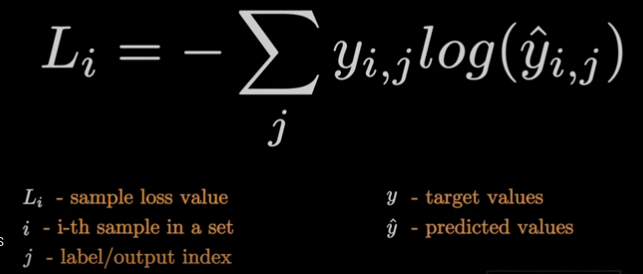
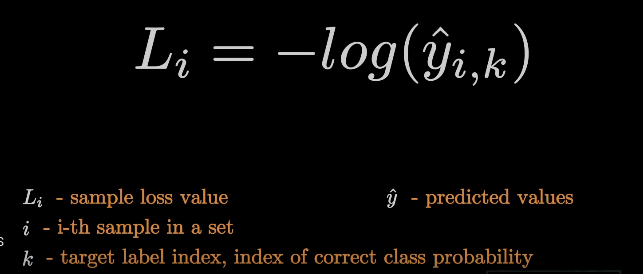
Takes the negative sum of the target value multiplied by the log of the predicted value for each of the values in the distribution. By simplifying using one-hot encoding the latter of the two pictures

https://www.google.com/search?channel=fs&client=ubuntu-sn&q=cateogrical+crossentropy+function#kpvalbx=_fERiZLCYC66Exc8P7pCGwAU_29


2.3. Train the network for 10 epochs and plot the training and validation accuracy for each epoch

In [8]:
## Define model ##
model_2 = Sequential()

model_2.add(Flatten())

model_2.add(Dense(64, activation = 'relu'))
model_2.add(Dense(64, activation = 'relu'))

model_2.add(Dense(num_classes, activation='softmax'))


model_2.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model_2.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.4585 - accuracy: 0.8736 - val_loss: 0.2718 - val_accuracy: 0.9206
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2242 - accuracy: 0.9360 - val_loss: 0.2088 - val_accuracy: 0.9378
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1749 - accuracy: 0.9492 - val_loss: 0.1533 - val_accuracy: 0.9545
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1442 - accuracy: 0.9581 - val_loss: 0.1555 - val_accuracy: 0.9547
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1248 - accuracy: 0.9639 - val_loss: 0.1261 - val_accuracy: 0.9640
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1089 - accuracy: 0.9678 - val_loss: 0.1134 - val_accuracy: 0.9666
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0963 - accuracy: 0.9719 - val_loss: 0.1055 - val_accuracy: 0.9689
Epoch 

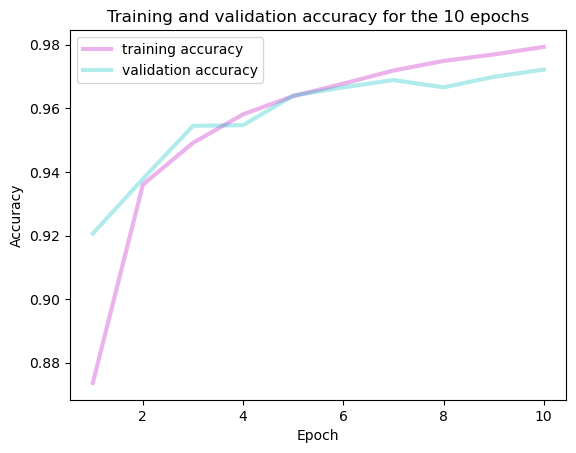

In [9]:
train_accuracy= fit_info.history['accuracy']
label_1='training accuracy'
label_2='validation accuracy'
val_accuracy= fit_info.history['val_accuracy']
x_epoch=list(range(1,11))
plt.plot(x_epoch, train_accuracy, 'm', label = label_1, linewidth=3, alpha=0.3)
plt.plot(x_epoch, val_accuracy, 'c', label = label_2, linewidth=3, alpha=0.3)
plt.legend()
plt.title('Training and validation accuracy for the 10 epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

2.4. Update the model to implement a three-layer neural network where the hidden layers have 500 and 300 hidden units respectively. Train for 40 epochs. What is the best validation accuracy you can achieve? – Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reach a validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights 2 (kernels): https://keras.io/api/layers/regularizers/). Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. Train 3 replicates networks for each regularization factor. Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization factor. How close do you get to Hintons result? – If you do not get the same results, what factors may influence this? (hint: What information is not given by Hinton on the MNIST database that may influence Model training)

In [30]:
#2nd recularization factor
## Define model ##
regularization_factors=[0.001,0.0001,0.0009,0.00001,0.000001]
val_acc_0_001=[]
val_acc_0_0001=[]
val_acc_0_0009=[]
val_acc_0_00001=[]
val_acc_0_000001=[]

#regularization factor 0.001
for _ in range(3):
    model_3 = Sequential()
    model_3.add(Flatten())
    model_3.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L1(0.001)))
    model_3.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L1(0.001)))
    model_3.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L1(0.001)))
    model_3.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L1(0.001)))

    model_3.add(Dense(num_classes, activation='softmax'))

    model_3.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1), metrics=['accuracy'],)
    epochs = 2
    fit_info = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_3.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_001.append(fit_info.history['val_accuracy'])

mean_0_001= np.mean(val_acc_0_001)
std_0_001=np.std(val_acc_0_001)
#print(val_acc_0_001)
print('mean=', mean_0_001)
print('std=', std_0_001)



Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 7.0982 - accuracy: 0.7910 - val_loss: 3.4486 - val_accuracy: 0.8819
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 2.0033 - accuracy: 0.8852 - val_loss: 1.1907 - val_accuracy: 0.9105
Test loss: 1.1907037496566772, Test accuracy 0.9104999899864197
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 7.0445 - accuracy: 0.8028 - val_loss: 3.4617 - val_accuracy: 0.8796
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 2.0057 - accuracy: 0.8861 - val_loss: 1.3204 - val_accuracy: 0.8608
Test loss: 1.3203647136688232, Test accuracy 0.86080002784729
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 7.0723 - accuracy: 0.7997 - val_loss: 3.3979 - val_accuracy: 0.9047
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 2.0131 - accuracy: 0.8794 - val_loss: 1.4090 - val_accuracy: 0.8441
Test loss: 1.408983111381530

In [31]:
#regularization factor 0.0001
for _ in range(3):
    model_4 = Sequential()
    model_4.add(Flatten())
    model_4.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L1(0.001)))
    model_4.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L1(0.001)))
    model_4.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L1(0.001)))
    model_4.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L1(0.001)))

    model_4.add(Dense(num_classes, activation='softmax'))
    model_4.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 2
    fit_info = model_4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_4.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_0001.append(fit_info.history['val_accuracy'])

mean_0_0001= np.mean(val_acc_0_0001)
std_0_0001=np.std(val_acc_0_0001)
#print(val_acc_0_0001)
print('mean=', mean_0_0001)
print('std=', std_0_0001)

Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 7.0583 - accuracy: 0.8103 - val_loss: 3.4185 - val_accuracy: 0.9041
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 2.0265 - accuracy: 0.8850 - val_loss: 1.3294 - val_accuracy: 0.8538
Test loss: 1.3294440507888794, Test accuracy 0.8537999987602234
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 7.0576 - accuracy: 0.8066 - val_loss: 3.5361 - val_accuracy: 0.8484
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 2.0014 - accuracy: 0.8819 - val_loss: 1.1855 - val_accuracy: 0.9055
Test loss: 1.185531735420227, Test accuracy 0.9054999947547913
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 7.0163 - accuracy: 0.8127 - val_loss: 3.4240 - val_accuracy: 0.8997
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 2.0245 - accuracy: 0.8842 - val_loss: 1.3458 - val_accuracy: 0.8609
Test loss: 1.34581136703491

In [32]:
#regularization factor 0.0009
for _ in range(3):
    model_5 = Sequential()
    model_5.add(Flatten())
    model_5.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L1(0.0009)))
    model_5.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L1(0.0009)))
    model_5.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L1(0.0009)))
    model_5.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L1(0.0009)))

    model_5.add(Dense(num_classes, activation='softmax'))
    model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 2
    fit_info = model_5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_5.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_0009.append(fit_info.history['val_accuracy'])

mean_0_0009= np.mean(val_acc_0_0009)
std_0_0009=np.std(val_acc_0_0009)
#print(val_acc_0_0009)
print('mean=', mean_0_0009)
print('std=', std_0_0009)

Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 6.7381 - accuracy: 0.8021 - val_loss: 3.5420 - val_accuracy: 0.9097
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 2.1515 - accuracy: 0.8845 - val_loss: 1.2269 - val_accuracy: 0.9098
Test loss: 1.2268928289413452, Test accuracy 0.9097999930381775
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 6.7283 - accuracy: 0.8056 - val_loss: 3.5658 - val_accuracy: 0.8974
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 2.1580 - accuracy: 0.8880 - val_loss: 1.3720 - val_accuracy: 0.8642
Test loss: 1.3720258474349976, Test accuracy 0.8641999959945679
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 6.7186 - accuracy: 0.8056 - val_loss: 3.7802 - val_accuracy: 0.8077
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 2.1538 - accuracy: 0.8871 - val_loss: 1.4066 - val_accuracy: 0.8619
Test loss: 1.4065908193588

In [36]:
#regularization factor 0.00001
for _ in range(3):
    model_6 = Sequential()
    model_6.add(Flatten())
    model_6.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L1(0.00001)))
    model_6.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L1(0.00001)))
    model_6.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L1(0.00001)))
    model_6.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L1(0.00001)))

    model_6.add(Dense(num_classes, activation='softmax'))
    model_6.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 2
    fit_info = model_6.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_6.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_00001.append(fit_info.history['val_accuracy'])

mean_0_00001= np.mean(val_acc_0_00001)
std_0_00001=np.std(val_acc_0_00001)
#print(val_acc_0_00001)
print('mean=', mean_0_00001)
print('std=', std_0_00001)

Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 0.6676 - accuracy: 0.8284 - val_loss: 0.3247 - val_accuracy: 0.9345
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.3044 - accuracy: 0.9409 - val_loss: 0.3067 - val_accuracy: 0.9384
Test loss: 0.3066525459289551, Test accuracy 0.9383999705314636
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 0.6684 - accuracy: 0.8260 - val_loss: 0.3244 - val_accuracy: 0.9354
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.3076 - accuracy: 0.9391 - val_loss: 0.2597 - val_accuracy: 0.9531
Test loss: 0.2596827745437622, Test accuracy 0.9531000256538391
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 0.6608 - accuracy: 0.8262 - val_loss: 0.3423 - val_accuracy: 0.9266
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.3048 - accuracy: 0.9401 - val_loss: 0.2705 - val_accuracy: 0.9501
Test loss: 0.2704817950725

In [37]:
#regularization factor 0.000001
for _ in range(3):
    model_7 = Sequential()
    model_7.add(Flatten())
    model_7.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L1(0.000001)))
    model_7.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L1(0.000001)))
    model_7.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L1(0.000001)))
    model_7.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L1(0.000001)))

    model_7.add(Dense(num_classes, activation='softmax'))
    model_7.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 2
    fit_info = model_7.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_7.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_000001.append(fit_info.history['val_accuracy'])

mean_0_000001= np.mean(val_acc_0_000001)
std_0_000001=np.std(val_acc_0_000001)
#print(val_acc_0_000001)
print('mean=', mean_0_000001)
print('std=', std_0_000001)

Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 0.5733 - accuracy: 0.8252 - val_loss: 0.2718 - val_accuracy: 0.9211
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.2100 - accuracy: 0.9397 - val_loss: 0.1833 - val_accuracy: 0.9475
Test loss: 0.18333256244659424, Test accuracy 0.9474999904632568
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 0.5735 - accuracy: 0.8217 - val_loss: 0.2538 - val_accuracy: 0.9258
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.2064 - accuracy: 0.9409 - val_loss: 0.1615 - val_accuracy: 0.9539
Test loss: 0.16145947575569153, Test accuracy 0.9538999795913696
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 0.5708 - accuracy: 0.8308 - val_loss: 0.2304 - val_accuracy: 0.9323
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.2052 - accuracy: 0.9410 - val_loss: 0.1673 - val_accuracy: 0.9529
Test loss: 0.16730423271

In [35]:
print(np.std(val_accuracies))

0.012087129334751768


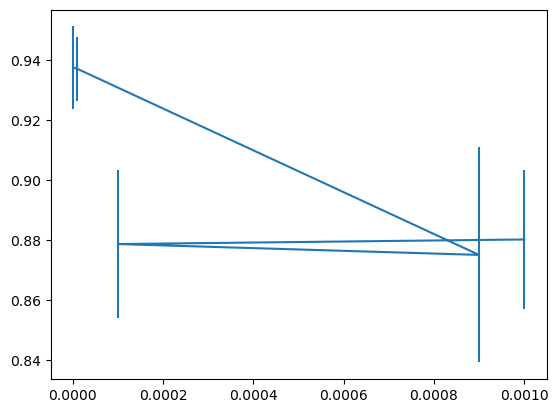

In [39]:
means = [mean_0_001,mean_0_0001,mean_0_0009,mean_0_00001,mean_0_000001]
stds = [std_0_001,std_0_0001,std_0_0009,std_0_00001,std_0_000001]
plt.errorbar(regularization_factors,means,yerr=stds)
plt.show()